In [1]:
import pandas as pd
from wordcloud import WordCloud
from pprint import pprint
import gensim
import matplotlib.pyplot as plt

In [2]:
corpus = gensim.corpora.textcorpus.TextCorpus('yelp_labelled.txt')

In [3]:
yelp_reviews = pd.DataFrame([' '.join(doc) for doc in corpus.get_texts()], columns=['txt'])


In [4]:
yelp_reviews

,txt
0,wow loved place
1,crust good
2,tasty texture nasty
3,stopped late bank holiday rick steve recommend...
4,selection menu great prices
...,...
995,think food flavor texture lacking
996,appetite instantly gone
997,overall impressed
998,experience underwhelming think ninja sushi time


# Create Wordcloud

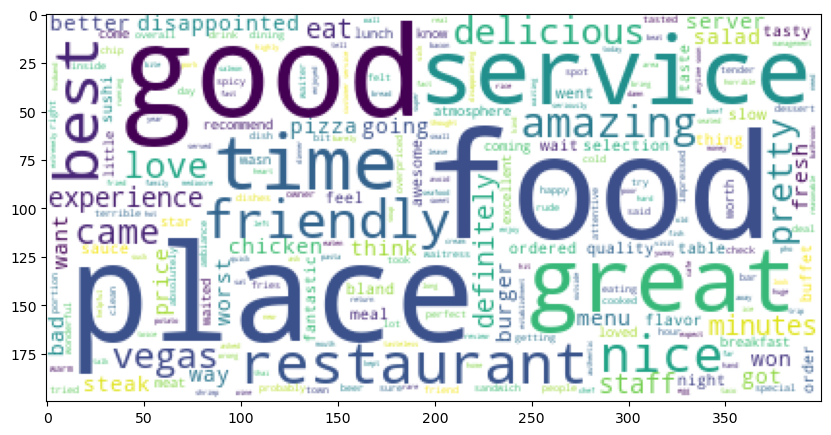

In [22]:
concatenated_docs = ', '.join(list(yelp_reviews['txt'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(concatenated_docs)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.show()

# Latent Dirichlet Allocation

In [6]:
model = gensim.models.LdaModel(corpus, id2word=corpus.dictionary, num_topics=10)

In [7]:
for topic_id in range(model.num_topics):
    topk = model.show_topic(topic_id, 10)
    topk_words = [ w for w, _ in topk ]
    
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: place good food burger chicken definitely hot amazing fresh going
1: service great food place menu minutes best restaurant bad terrible
2: place minutes vegas restaurant eat quality experience bad night food
3: good place service time nice pretty bar want like food
4: good food place friendly time definitely experience far way great
5: good place food best overall better steak staff worst sauce
6: food place great service like delicious amazing wait think minutes
7: food good great time service waited selection got vegas amazing
8: good food came stars like staff time service disappointed friendly
9: service place time feel left food buffet love like bit


In [8]:
pprint(model.print_topics())


[(0,
  '0.019*"place" + 0.012*"good" + 0.011*"food" + 0.010*"burger" + '
  '0.010*"chicken" + 0.009*"definitely" + 0.007*"hot" + 0.007*"amazing" + '
  '0.007*"fresh" + 0.007*"going"'),
 (1,
  '0.031*"service" + 0.026*"great" + 0.018*"food" + 0.013*"place" + '
  '0.009*"menu" + 0.008*"minutes" + 0.007*"best" + 0.006*"restaurant" + '
  '0.006*"bad" + 0.006*"terrible"'),
 (2,
  '0.022*"place" + 0.012*"minutes" + 0.012*"vegas" + 0.010*"restaurant" + '
  '0.010*"eat" + 0.008*"quality" + 0.008*"experience" + 0.008*"bad" + '
  '0.008*"night" + 0.006*"food"'),
 (3,
  '0.025*"good" + 0.017*"place" + 0.014*"service" + 0.011*"time" + '
  '0.009*"nice" + 0.009*"pretty" + 0.008*"bar" + 0.008*"want" + 0.008*"like" + '
  '0.008*"food"'),
 (4,
  '0.019*"good" + 0.017*"food" + 0.013*"place" + 0.012*"friendly" + '
  '0.012*"time" + 0.010*"definitely" + 0.009*"experience" + 0.007*"far" + '
  '0.007*"way" + 0.007*"great"'),
 (5,
  '0.022*"good" + 0.017*"place" + 0.013*"food" + 0.010*"best" + '
  '0.009*"o